In [13]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt

def Rotation(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Define the shifted-rotated Rastrigin function
def f1(x, x_star=np.array([0.1, 0.1]), theta=0.2):
    z = Rotation(theta) * (x - x_star)
    return np.sum(z**2 + 1 - np.cos(10 * np.pi * z))

# adding resolution function 

def e_r(x, x_star=np.array([0.1, 0.1]), theta=0.2, phi = 10000): 

    z = Rotation(theta) * (x - x_star)

    O = 1 - .0001*phi
    W = 10 * np.pi * O
    B = .5 * np.pi * O
    
    return np.sum(O * np.cos(W * z + B + np.pi)**2)

iteration = 0
bias = 0
bounds = [(-.1, .2), (-.1, .2)]


objective_value = []
location_step = []

eval_high = []
eval_low = []

first_iter = False

def high_fidelity_loss(x):
    global eval_high,bounds,iteration
    eval_high.append(np.append(x,iteration)) 
    
    if bounds[1][0] > x[0] or x[0] > bounds[1][1]:
        return 1e10
    if bounds[1][0] > x[1] or x[1] > bounds[1][1]:
        return 1e10
    else:
        return f1(x)

def low_fidelity_loss(x):
    global eval_low, bounds,iteration
    eval_low.append(np.append(x,iteration)) 

    if bounds[1][0] > x[0] or x[0] > bounds[1][1]:
        return 1e10
    if bounds[1][0] > x[1] or x[1] > bounds[1][1]:
        return 1e10
        
    else:
        return f1(x)

def multifidelity_loss(x):
    global bias, first_iter
    
    if first_iter:
        hf_loss = high_fidelity_loss(x)
        lf_loss = low_fidelity_loss(x)
        bias = hf_loss - lf_loss

        mf_loss = lf_loss + bias

        print(f"Initial Eval: ")
        print(f"  HF Loss: {hf_loss}")
        print(f"  LF Loss: {lf_loss}")
        print(f"  Bias: {bias}")
        print(f"  MF Loss: {mf_loss}")

        first_iter = False

    else:
        lf_loss = low_fidelity_loss(x)
        mf_loss = lf_loss
        print(f"    FunctionEval: LF Loss = {lf_loss}, Bias = {bias}, MF Loss = {mf_loss}")
        
    return mf_loss

def callback(x):
    global iteration, bias, objective_value, location_step

    hf_loss = high_fidelity_loss(x)
    lf_loss = low_fidelity_loss(x)
    bias = hf_loss - lf_loss

    mf_loss = lf_loss + bias
    objective_value.append(mf_loss)
    location_step.append(x)

    print(f"Iteration {iteration}:")
    print(f"  HF Loss: {hf_loss}")
    print(f"  LF Loss: {lf_loss}")
    print(f"  Bias: {bias}")
    print(f"  MF Loss: {mf_loss}")

    iteration += 1





In [14]:
x0 = np.array([.01,.095])
location_step.append(x0)


result = scipy.optimize.minimize(multifidelity_loss, x0, method='L-BFGS-B',bounds = bounds,jac = '3-point', callback=callback, options={'ftol': 1e-20, 'gtol': 1e-22, 'eps': 1e-20 })


    FunctionEval: LF Loss = 2.1062399446482623, Bias = 0, MF Loss = 2.1062399446482623
    FunctionEval: LF Loss = 2.106328662059399, Bias = 0, MF Loss = 2.106328662059399
    FunctionEval: LF Loss = 2.106151196116387, Bias = 0, MF Loss = 2.106151196116387
    FunctionEval: LF Loss = 2.106269792163788, Bias = 0, MF Loss = 2.106269792163788
    FunctionEval: LF Loss = 2.1062101329846468, Bias = 0, MF Loss = 2.1062101329846468
    FunctionEval: LF Loss = 4.393145464486355, Bias = 0, MF Loss = 4.393145464486355
    FunctionEval: LF Loss = 4.393110481592876, Bias = 0, MF Loss = 4.393110481592876
    FunctionEval: LF Loss = 4.3930754652384545, Bias = 0, MF Loss = 4.3930754652384545
    FunctionEval: LF Loss = 4.393110481592876, Bias = 0, MF Loss = 4.393110481592876
    FunctionEval: LF Loss = 4.3930754652384545, Bias = 0, MF Loss = 4.3930754652384545
    FunctionEval: LF Loss = 1.397888870483628, Bias = 0, MF Loss = 1.397888870483628
    FunctionEval: LF Loss = 1.3980834634512316, Bias = 0,

In [15]:
print("Optimization Results:")
print(f"Optimal Solution: {result.x}")
print(f"Optimal Loss: {result.fun}")

D = 100

x1 = np.linspace(-1, 1, D)
x2 = np.linspace(-1, 1, D)
x1 = np.linspace(-.1, .2, D)
x2 = np.linspace(-.1, .2, D)


X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[f1(np.array([x1, x2])) for x1, x2 in zip(row1, row2)] for row1, row2 in zip(X1, X2)])

np.shape(np.array([location_step])[0])



Optimization Results:
Optimal Solution: [0.1 0.1]
Optimal Loss: 0.0


(10, 2)

In [16]:
#%matplotlib 

In [17]:
eval_low_array = np.array([eval_low])[0]


In [18]:
eval_low_array

array([[0.01      , 0.095     , 0.        ],
       [0.00999394, 0.095     , 0.        ],
       [0.01000606, 0.095     , 0.        ],
       [0.01      , 0.09499394, 0.        ],
       [0.01      , 0.09500606, 0.        ],
       [0.2       , 0.2       , 0.        ],
       [0.19999394, 0.2       , 0.        ],
       [0.19998789, 0.2       , 0.        ],
       [0.2       , 0.19999394, 0.        ],
       [0.2       , 0.19998789, 0.        ],
       [0.04053137, 0.1118726 , 0.        ],
       [0.04052531, 0.1118726 , 0.        ],
       [0.04053742, 0.1118726 , 0.        ],
       [0.04053137, 0.11186654, 0.        ],
       [0.04053137, 0.11187865, 0.        ],
       [0.12026568, 0.1559363 , 0.        ],
       [0.12025963, 0.1559363 , 0.        ],
       [0.12027174, 0.1559363 , 0.        ],
       [0.12026568, 0.15593024, 0.        ],
       [0.12026568, 0.15594235, 0.        ],
       [0.08184405, 0.13470329, 0.        ],
       [0.081838  , 0.13470329, 0.        ],
       [0.

In [19]:
eval_low_array

array([[0.01      , 0.095     , 0.        ],
       [0.00999394, 0.095     , 0.        ],
       [0.01000606, 0.095     , 0.        ],
       [0.01      , 0.09499394, 0.        ],
       [0.01      , 0.09500606, 0.        ],
       [0.2       , 0.2       , 0.        ],
       [0.19999394, 0.2       , 0.        ],
       [0.19998789, 0.2       , 0.        ],
       [0.2       , 0.19999394, 0.        ],
       [0.2       , 0.19998789, 0.        ],
       [0.04053137, 0.1118726 , 0.        ],
       [0.04052531, 0.1118726 , 0.        ],
       [0.04053742, 0.1118726 , 0.        ],
       [0.04053137, 0.11186654, 0.        ],
       [0.04053137, 0.11187865, 0.        ],
       [0.12026568, 0.1559363 , 0.        ],
       [0.12025963, 0.1559363 , 0.        ],
       [0.12027174, 0.1559363 , 0.        ],
       [0.12026568, 0.15593024, 0.        ],
       [0.12026568, 0.15594235, 0.        ],
       [0.08184405, 0.13470329, 0.        ],
       [0.081838  , 0.13470329, 0.        ],
       [0.

Text(0, 0.5, 'X2')

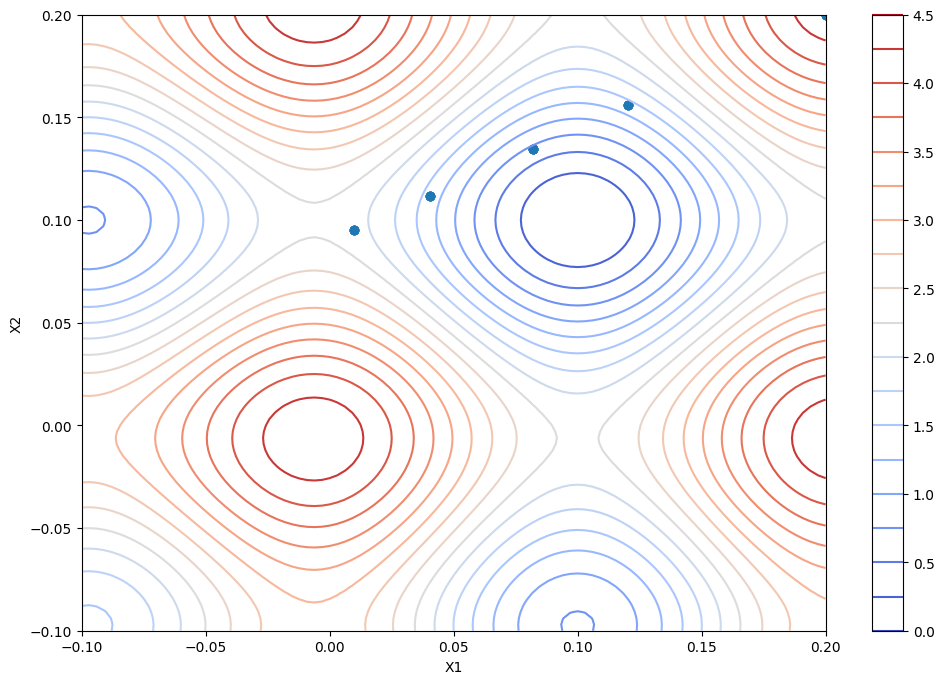

In [20]:
plt.figure(figsize = (12,8))

location_step_array = np.array([location_step])[0]
eval_high_array = np.array([eval_high])[0]
eval_low_array = np.array([eval_low])[0]


contour = plt.contour(X1, X2, Z, cmap='coolwarm', levels = 20)
plt.colorbar(contour)

# steps 

iter_arg = 0
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1])


#plt.plot(location_step_array[:,0],location_step_array[:,1],'--d', color = 'orange',ms = 5, label = 'Steps')

#plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

#plt.show()

Text(0, 0.5, 'X2')

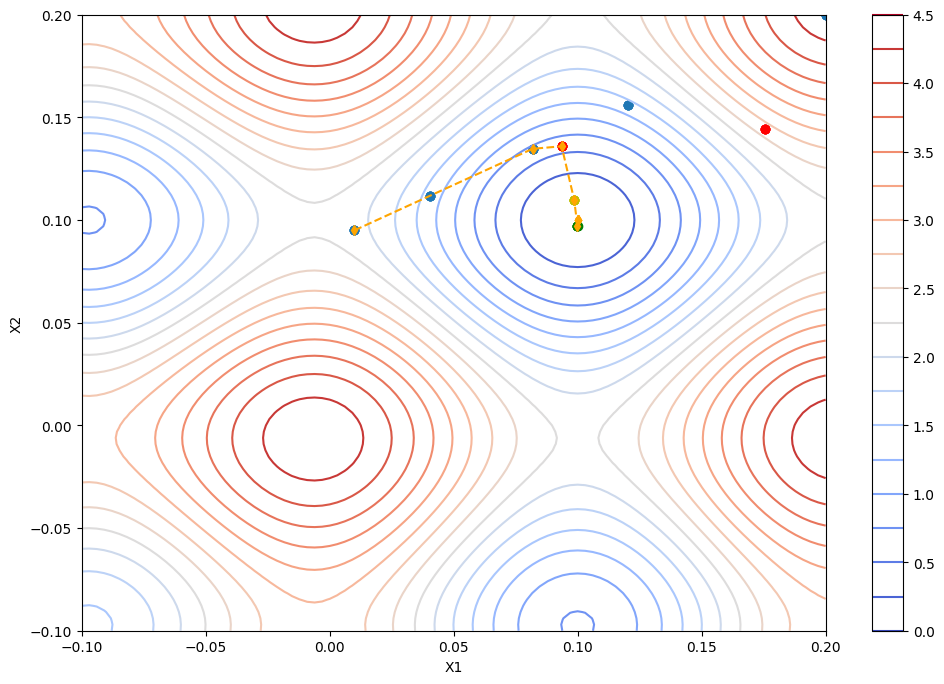

In [21]:
plt.figure(figsize = (12,8))

location_step_array = np.array([location_step])[0]
eval_high_array = np.array([eval_high])[0]
eval_low_array = np.array([eval_low])[0]


contour = plt.contour(X1, X2, Z, cmap='coolwarm', levels = 20)
plt.colorbar(contour)

# steps 

iter_arg = 0
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1])

iter_arg = 1
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'r')

iter_arg = 2
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'y')

iter_arg = 3
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'g')

plt.plot(location_step_array[:,0],location_step_array[:,1],'--d', color = 'orange',ms = 5, label = 'Steps')

#plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

#plt.show()


In [22]:
eval_low_array.shape

(194, 3)

Text(0, 0.5, 'X2')

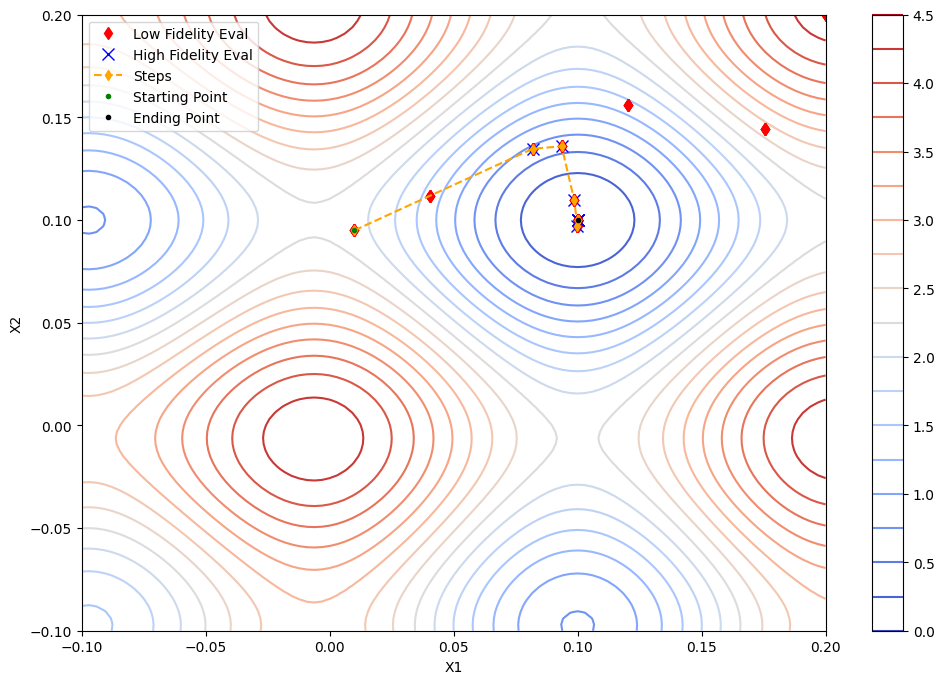

In [23]:
plt.figure(figsize = (12,8))

location_step_array = np.array([location_step])[0]
eval_high_array = np.array([eval_high])[0]
eval_low_array = np.array([eval_low])[0]


contour = plt.contour(X1, X2, Z, cmap='coolwarm', levels = 20)
plt.colorbar(contour)

# steps 


plt.plot(eval_low_array[:,0],eval_low_array[:,1],'d', color = 'red',ms = 6, label = 'Low Fidelity Eval')
plt.plot(eval_high_array[:,0],eval_high_array[:,1],'x', color = 'blue',ms = 9, label = 'High Fidelity Eval')

plt.plot(location_step_array[:,0],location_step_array[:,1],'--d', color = 'orange',ms = 5, label = 'Steps')


plt.plot(x0[0],x0[1],'.', color = 'green',ms = 6, label = 'Starting Point')
plt.plot(result.x[0], result.x[1],'.', color = 'black',ms = 6,label = 'Ending Point')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')


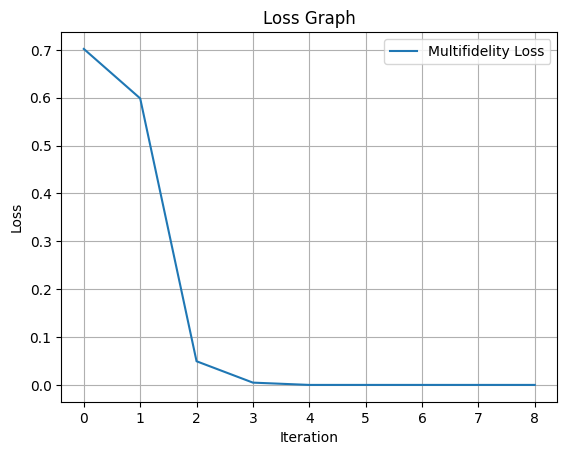

In [24]:
plt.figure()
plt.plot(objective_value, label="Multifidelity Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.grid()
plt.legend()
plt.show()


In [32]:
def Rotation(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def f1(x, x_star=np.array([0.1, 0.1]), theta=0.2):
    z = Rotation(theta) @ (x - x_star)
    return np.sum(z**2 + 1 - np.cos(10 * np.pi * z))

def e_r(x, x_star=np.array([0.1, 0.1]), theta=0.2, phi=10000): 
    z = Rotation(theta) @ (x - x_star)
    O = 1 - 0.0001 * phi
    W = 10 * np.pi * O
    B = 0.5 * np.pi * O
    return np.sum(O * np.cos(W * z + B + np.pi)**2)

iteration = 0
objective_value = []
function_eval = []
location_step = []

def high_fidelity_loss(x):
    global function_eval, iteration
    function_eval.append(np.append(x, iteration))
    return f1(x)

def callback(x, res):
    global iteration, objective_value, location_step

    hf_loss = high_fidelity_loss(x)
    objective_value.append(hf_loss)

    location_step.append(x)

    print(f"Iteration {iteration}:")
    print(f"  Location: {x}")
    print(f"  HF Loss: {hf_loss}")

    iteration += 1

x0 = np.array([0.01, 0.095])

bounds = [(-0.1, 0.2), (-0.1, 0.2)]
linear_bounds = scipy.optimize.Bounds(
    [b[0] for b in bounds],
    [b[1] for b in bounds]
)

result = scipy.optimize.minimize(
    high_fidelity_loss,
    x0,
    method='trust-constr',
    bounds=linear_bounds,
    callback=callback,
    options={
        'xtol': 1e-8,
        'gtol': 1e-6,
        'initial_tr_radius': 0.1,
        'maxiter': 100
    }
)

Iteration 0:
  Location: [0.01  0.095]
  HF Loss: 2.173860281166188
Iteration 1:
  Location: [0.03718854 0.11628866]
  HF Loss: 1.4584548494771166
Iteration 2:
  Location: [0.03718854 0.11628866]
  HF Loss: 1.4584548494771166
Iteration 3:
  Location: [0.08033109 0.13799845]
  HF Loss: 0.8364296034352026
Iteration 4:
  Location: [0.07268147 0.12725338]
  HF Loss: 0.6859896073431533
Iteration 5:
  Location: [0.07691049 0.10980078]
  HF Loss: 0.2965760621736684
Iteration 6:
  Location: [0.09635397 0.09662563]
  HF Loss: 0.012190120255721415
Iteration 7:
  Location: [0.09953365 0.0995166 ]
  HF Loss: 0.00022308315076036145
Iteration 8:
  Location: [0.09953365 0.0995166 ]
  HF Loss: 0.00022308315076036145
Iteration 9:
  Location: [0.09989924 0.09989932]
  HF Loss: 1.0033197081038558e-05
Iteration 10:
  Location: [0.09989924 0.09989932]
  HF Loss: 1.0033197081038558e-05
Iteration 11:
  Location: [0.09997974 0.09997974]
  HF Loss: 4.058533169537526e-07


In [31]:
function_eval

[array([0.01 , 0.095]),
 array([0.01000001, 0.095     ]),
 array([0.01      , 0.09500001]),
 array([0.01 , 0.095]),
 array([0.03718854, 0.11628866]),
 array([0.03718856, 0.11628866]),
 array([0.03718854, 0.11628868]),
 array([0.03718854, 0.11628866]),
 array([0.15336623, 0.17932192]),
 array([0.15336624, 0.17932192]),
 array([0.15336623, 0.17932194]),
 array([0.03718854, 0.11628866]),
 array([0.08033109, 0.13799845]),
 array([0.08033111, 0.13799845]),
 array([0.08033109, 0.13799847]),
 array([0.08033109, 0.13799845]),
 array([0.07268147, 0.12725338]),
 array([0.07268148, 0.12725338]),
 array([0.07268147, 0.12725339]),
 array([0.07268147, 0.12725338]),
 array([0.07691049, 0.10980078]),
 array([0.0769105 , 0.10980078]),
 array([0.07691049, 0.10980079]),
 array([0.07691049, 0.10980078]),
 array([0.09635397, 0.09662563]),
 array([0.09635399, 0.09662563]),
 array([0.09635397, 0.09662564]),
 array([0.09635397, 0.09662563]),
 array([0.09953365, 0.0995166 ]),
 array([0.09953366, 0.0995166 ]),


Text(0, 0.5, 'X2')

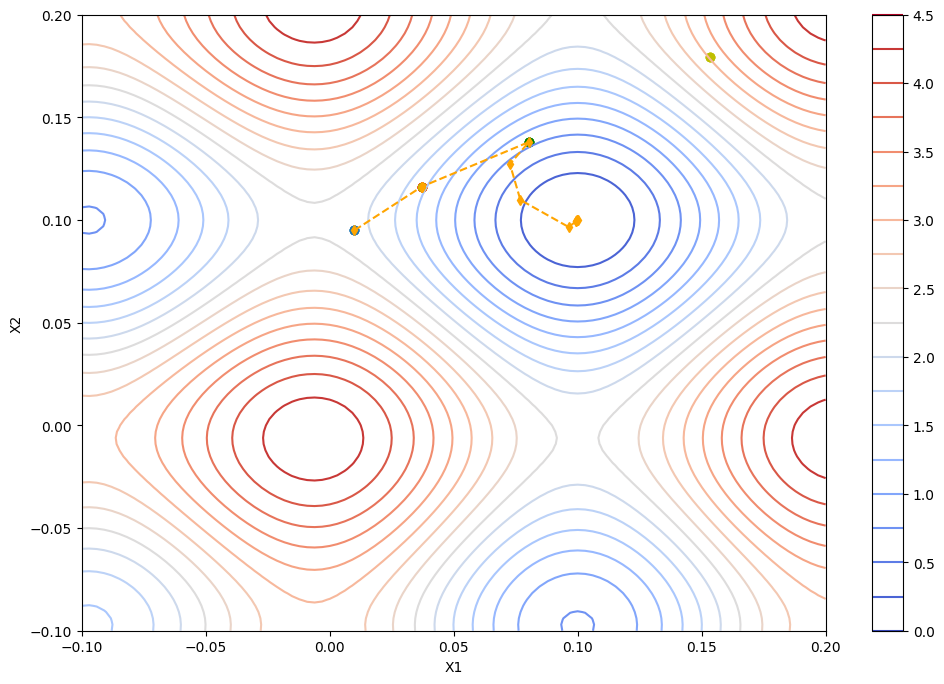

In [33]:
plt.figure(figsize = (12,8))

location_step_array = np.array([location_step])[0]
function_eval_array = np.array([function_eval])[0]


contour = plt.contour(X1, X2, Z, cmap='coolwarm', levels = 20)
plt.colorbar(contour)

eval_low_array = function_eval_array
# steps 

iter_arg = 0
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1])

iter_arg = 1
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'r')

iter_arg = 2
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'y')

iter_arg = 3
arg = np.argwhere(eval_low_array[:,2] == iter_arg)
plt.scatter(eval_low_array[arg,0],eval_low_array[arg,1], c = 'g')

#plt.plot(location_step_array[:,0],location_step_array[:,1],'--d', color = 'orange',ms = 5, label = 'Steps')

#plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

#plt.show()
